In [1]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading the dataset 
df = pd.read_csv('fifa_cleaned.csv')

In [3]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,24-06-1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,14-02-1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,15-03-1993,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,04-06-1991,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,20-06-1991,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


## Data Cleaning and Visualization 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.isnull().sum()

id                                   0
name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
work_rate                            0
body_type                            0
release_clause_euro               1837
club_team                           14
club_rating                         14
club_position                       14
club_jersey_number                  14
club_join_date                    1936
contract_end_year        

In [6]:
df.shape

(17954, 92)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [8]:
# columns to drop
columns_to_drop = ['tags']  # Initialize with 'tags' column
threshold = 10000

# Iterate through columns and add those with more than threshold null values to the list
for column in df.columns:
    if df[column].isnull().sum() > threshold:
        columns_to_drop.append(column)

# Drop the columns from the DataFrame
df_threshold=df
df = df.drop(columns=columns_to_drop)


In [9]:
df = df.drop('traits',axis=1)

In [10]:
columns_to_check = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 
                    'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 
                    'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

# Drop rows columns have null values
df = df.dropna(subset=columns_to_check)


In [11]:
import pandas as pd

def clean_dataset(df):
    
    # Convert birth_date to datetime
    df['birth_date'] = pd.to_datetime(df['birth_date'])
    
    # Convert club_join_date to datetime
    df['club_join_date'] = pd.to_datetime(df['club_join_date'])
    
    # Convert 'work_rate' to two separate columns 'work_rate_attack' and 'work_rate_defense'
    df[['work_rate_attack', 'work_rate_defense']] = df['work_rate'].str.split('/', expand=True)
    df.drop(columns=['work_rate'], inplace=True)
    
    # Drop rows with missing values in specific columns
    df.dropna(subset=['release_clause_euro', 'club_rating'], inplace=True)
    
    # Convert 'club_join_date' to year
    df['club_join_year'] = df['club_join_date'].dt.year
    df.drop(columns=['club_join_date'], inplace=True)
    
    # Reset index
    df.reset_index(drop=True, inplace=True)
    
    return df


# Clean the dataset
df = clean_dataset(df)

# Display the cleaned dataset
print(df.head())


       id          name                       full_name birth_date  age  \
0  158023      L. Messi  Lionel Andrés Messi Cuccittini 1987-06-24   31   
1  190460    C. Eriksen    Christian  Dannemann Eriksen 1992-02-14   27   
2  195864      P. Pogba                      Paul Pogba 1993-03-15   25   
3  198219    L. Insigne                 Lorenzo Insigne 1991-04-06   27   
4  201024  K. Koulibaly               Kalidou Koulibaly 1991-06-20   27   

   height_cm  weight_kgs  positions nationality  overall_rating  potential  \
0     170.18        72.1   CF,RW,ST   Argentina              94         94   
1     154.94        76.2  CAM,RM,CM     Denmark              88         89   
2     190.50        83.9     CM,CAM      France              88         91   
3     162.56        59.0      LW,ST       Italy              88         88   
4     187.96        88.9         CB     Senegal              88         91   

    value_euro  wage_euro preferred_foot  international_reputation(1-5)  \
0  11

In [12]:
df = df.drop('club_join_year',axis=1)
df = df.drop('contract_end_year',axis=1)

In [13]:
# work_rate_defense into separate columns
def split_work_rate_defense(df):
    work_rate_defense = df['work_rate_defense'].str.get_dummies(sep='/')
    df = pd.concat([df, work_rate_defense], axis=1)
    df.drop(columns=['work_rate_defense'], inplace=True)
    return df
df = split_work_rate_defense(df)

In [14]:
import pandas as pd
# Split work_rate_attack into separate columns
def split_work_rate_attack(df):
    work_rate_attack = df['work_rate_attack'].str.get_dummies(sep='/')
    
    # Add the new columns to the DataFrame
    df = pd.concat([df, work_rate_attack], axis=1)
    
    
    # Drop the original work_rate_attack column
    df.drop(columns=['work_rate_attack'], inplace=True)
    return df

# Call the function to split the work_rate_attack column
df = split_work_rate_attack(df)

In [15]:
# Dummy variables

In [16]:
# club_position
def create_dummy_club_position(df):
    # club_position
    club_position_dummies = pd.get_dummies(df['club_position'], prefix='club_position')
    df = pd.concat([df, club_position_dummies], axis=1)
    df.drop(columns=['club_position'], inplace=True)
    return df
df = create_dummy_club_position(df)

In [17]:
# preferred_foot
def create_dummy_preferred_foot(df):
    preferred_foot_dummies = pd.get_dummies(df['preferred_foot'], prefix='preferred_foot', drop_first=True)
    df = pd.concat([df, preferred_foot_dummies], axis=1)
    df.drop(columns=['preferred_foot'], inplace=True)
    return df
df = create_dummy_preferred_foot(df)

In [18]:
# body_type
def create_dummy_body_type(df):
    body_type_dummies = pd.get_dummies(df['body_type'], prefix='body_type')
    df = pd.concat([df, body_type_dummies], axis=1)
    df.drop(columns=['body_type'], inplace=True)
    return df
df = create_dummy_body_type(df)

# MODEL 
#Dynamic Player Rating Prediction

In [19]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,club_team,club_rating,club_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,High,Low,Medium,High,Low,Medium,club_position_CAM,club_position_CB,club_position_CDM,club_position_CF,club_position_CM,club_position_LAM,club_position_LB,club_position_LCB,club_position_LCM,club_position_LDM,club_position_LF,club_position_LM,club_position_LS,club_position_LW,club_position_LWB,club_position_RAM,club_position_RB,club_position_RCB,club_position_RCM,club_position_RDM,club_position_RES,club_position_RF,club_position_RM,club_position_RS,club_position_RW,club_position_RWB,club_position_ST,club_position_SUB,preferred_foot_Right,body_type_Akinfenwa,body_type_C. Ronaldo,body_type_Lean,body_type_Messi,body_type_Neymar,body_type_Normal,body_type_PLAYER_BODY_TYPE_25,body_type_Shaqiri,body_type_Stocky
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,5,4,4,226500000.0,FC Barcelona,86.0,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,3,5,4,133800000.0,Tottenham Hotspur,83.0,23.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,4,4,5,144200000.0,Manchester United,82.0,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,198219,L. Insigne,Lorenzo Insigne,1991-04-06,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,3,4,4,105400000.0,Napoli,82.0,24.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,3,2,106500000.0,Napoli,82.0,26.0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
features = ['age','potential', 'height_cm', 'weight_kgs', 
            'crossing', 'finishing', 'dribbling',  
            'preferred_foot_Right', 'High', 'Low', 
            'Medium', 'High', 'Low', 
            'Medium', 'club_rating']
target = 'overall_rating'  
df.dropna(subset=features + [target], inplace=True)

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6.096897664964196


In [21]:
# For Accurcy R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (Coefficient of Determination):", r2)


R-squared (Coefficient of Determination): 0.8721754263093149


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (Coefficient of Determination):", r2)

Mean Squared Error (MSE): 6.096897664964196
Root Mean Squared Error (RMSE): 2.469189677802051
Mean Absolute Error (MAE): 1.9560727237752116
R-squared (Coefficient of Determination): 0.8721754263093149


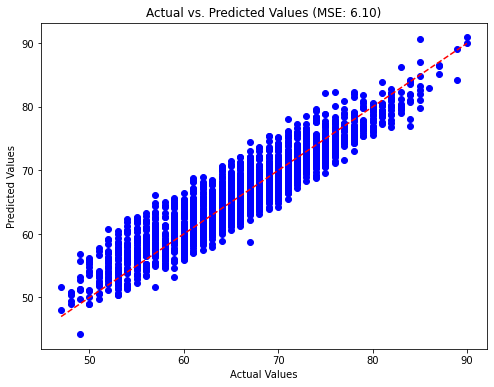

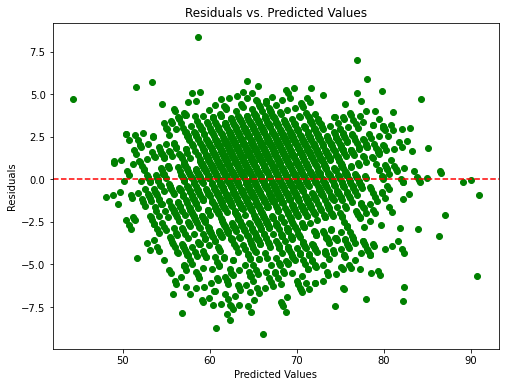

In [23]:
import matplotlib.pyplot as plt

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (MSE: {:.2f})'.format(mse))
plt.show()

# Plotting Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Existing code
features = ['age', 'potential', 'height_cm', 'weight_kgs', 
            'crossing', 'finishing', 'dribbling',  
             'club_rating']
target = 'overall_rating'  
df.dropna(subset=features + [target], inplace=True)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# New function to predict future overall rating for a given player
def predict_player_rating(player_name):
    # Find the player data based on the player name
    player_data = df[df['name'] == player_name]
    
    if player_data.empty:
        print(f"No data found for player: {player_name}")
        return None
    
    # Extract the features for the player
    player_features = player_data[features].values
    
    # Predict the overall rating using the trained model
    predicted_rating = model.predict(player_features)
    
    # Return the predicted overall rating
    return predicted_rating[0]

# Example usage
player_name = input("Enter the player name: ")
predicted_rating = predict_player_rating(player_name)
if predicted_rating is not None:
    print(f"The predicted future performance rating for {player_name} is: {predicted_rating}")


Mean Squared Error: 6.142878614679018
Enter the player name: L. Messi
The predicted future performance rating for L. Messi is: 93.28394702090128


# 2nd Problem
	Position Classification
    Categorise players into distinct positions, such as forward, midfielder, defender, or goalkeeper.

In [25]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,club_team,club_rating,club_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,High,Low,Medium,High,Low,Medium,club_position_CAM,club_position_CB,club_position_CDM,club_position_CF,club_position_CM,club_position_LAM,club_position_LB,club_position_LCB,club_position_LCM,club_position_LDM,club_position_LF,club_position_LM,club_position_LS,club_position_LW,club_position_LWB,club_position_RAM,club_position_RB,club_position_RCB,club_position_RCM,club_position_RDM,club_position_RES,club_position_RF,club_position_RM,club_position_RS,club_position_RW,club_position_RWB,club_position_ST,club_position_SUB,preferred_foot_Right,body_type_Akinfenwa,body_type_C. Ronaldo,body_type_Lean,body_type_Messi,body_type_Neymar,body_type_Normal,body_type_PLAYER_BODY_TYPE_25,body_type_Shaqiri,body_type_Stocky
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,5,4,4,226500000.0,FC Barcelona,86.0,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,3,5,4,133800000.0,Tottenham Hotspur,83.0,23.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,4,4,5,144200000.0,Manchester United,82.0,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,198219,L. Insigne,Lorenzo Insigne,1991-04-06,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,3,4,4,105400000.0,Napoli,82.0,24.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,3,2,106500000.0,Napoli,82.0,26.0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

position_categories = {
    'Goalkeeper': ['GK_diving','GK_handling','GK_kicking','GK_positioning','GK_reflexes'],
    'Defender': ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB'],
    'Midfielder': ['CM', 'CDM', 'CAM', 'LM', 'RM', 'LCM', 'RCM', 'LDM', 'RDM', 'LAM', 'RAM'],
    'Forward': ['ST', 'CF', 'LF', 'RF', 'LS', 'RS', 'LW', 'RW']
}

def categorize_position(position):
    for category, positions_list in position_categories.items():
        if position in positions_list:
            return category
    return 'Unknown'

# Apply categorization function to create new column
df['position_category'] = df['positions'].apply(categorize_position)
label_encoder = LabelEncoder()
df['position_category_encoded'] = label_encoder.fit_transform(df['position_category'])

# training and testing sets
X = df[['overall_rating', 'age', 'height_cm', 'weight_kgs']]
y = df['position_category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

#  predictions 
y_pred = logreg_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)


In [27]:
def categorize_positions(df):
    # Define a dictionary to categorize positions
    position_categories = {
        'forward': ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW'],
        'midfielder': ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM'],
        'defender': ['LB', 'LCB', 'CB', 'RCB', 'RB', 'LWB', 'RWB'],
        'goalkeeper': ['GK_diving','GK_handling','GK_kicking','GK_positioning','GK_reflexes'],
    }
    
    # Create a new column for position category
    def classify_position(positions):
        for category, pos_list in position_categories.items():
            if any(pos in positions for pos in pos_list):
                return category
        return 'goal keeper'

    # Apply the classification function to the 'positions' column
    df['position_category'] = df['positions'].apply(classify_position)
    
    return df

# Call the function to categorize positions
df = categorize_positions(df)

# Check the position categories
print(df['position_category'].value_counts())


midfielder    5821
forward       4259
defender      4100
Name: position_category, dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14180 entries, 0 to 14179
Columns: 126 entries, id to position_category_encoded
dtypes: datetime64[ns](1), float64(7), int32(1), int64(47), object(32), uint8(38)
memory usage: 10.0+ MB


In [29]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,club_team,club_rating,club_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,High,Low,Medium,High,Low,Medium,club_position_CAM,club_position_CB,club_position_CDM,club_position_CF,club_position_CM,club_position_LAM,club_position_LB,club_position_LCB,club_position_LCM,club_position_LDM,club_position_LF,club_position_LM,club_position_LS,club_position_LW,club_position_LWB,club_position_RAM,club_position_RB,club_position_RCB,club_position_RCM,club_position_RDM,club_position_RES,club_position_RF,club_position_RM,club_position_RS,club_position_RW,club_position_RWB,club_position_ST,club_position_SUB,preferred_foot_Right,body_type_Akinfenwa,body_type_C. Ronaldo,body_type_Lean,body_type_Messi,body_type_Neymar,body_type_Normal,body_type_PLAYER_BODY_TYPE_25,body_type_Shaqiri,body_type_Stocky,position_category,position_category_encoded
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,5,4,4,226500000.0,FC Barcelona,86.0,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,forward,3
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,3,5,4,133800000.0,Tottenham Hotspur,83.0,23.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,midfielder,3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,4,4,5,144200000.0,Manchester United,82.0,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,midfielder,3
3,198219,L. Insigne,Lorenzo Insigne,1991-04-06,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,3,4,4,105400000.0,Napoli,82.0,24.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,forward,3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,3,2,106500000.0,Napoli,82.0,26.0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,defender,0


# 3rd 
# Transfer Impact Prediction: Estimate the features impacting transer of a player 

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load the cleaned dataset
df = pd.read_csv('fifa_cleaned.csv')

# Select relevant features
features = [
    'overall_rating', 'potential', 'age', 'height_cm', 'weight_kgs',
    'acceleration', 'sprint_speed', 'agility', 'balance', 'stamina',
    'strength', 'ball_control', 'dribbling', 'short_passing', 'long_passing',
    'curve', 'finishing', 'crossing', 'freekick_accuracy', 'long_shots',
    'vision', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle','value_euro'
  
]

# Convert categorical features into numerical form
categorical_features = ['club_team', 'nationality', 'positions']

# Use one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

 #Define target variable (market value) and features
X = df_encoded[features]
y = df_encoded['wage_euro']
X = df[features]
y = df['wage_euro']
# Check for missing and infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with mean or median
X.fillna(X.mean(), inplace=True)
y.fillna(y.median(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the market value on the testing data
y_pred = model.predict(X_test)

# Evaluate the model

r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2:.2f}')

# Feature importance
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Display feature importance
for name, importance in zip(feature_names, feature_importance):
    print(f'{name}: {importance:.4f}')


R² Score: 0.80
overall_rating: 0.5551
potential: 0.0063
age: 0.0089
height_cm: 0.0066
weight_kgs: 0.0099
acceleration: 0.0069
sprint_speed: 0.0084
agility: 0.0076
balance: 0.0079
stamina: 0.0109
strength: 0.0091
ball_control: 0.0079
dribbling: 0.0082
short_passing: 0.0088
long_passing: 0.0096
curve: 0.0090
finishing: 0.0082
crossing: 0.0107
freekick_accuracy: 0.0120
long_shots: 0.0112
vision: 0.0090
positioning: 0.0072
marking: 0.0086
standing_tackle: 0.0078
sliding_tackle: 0.0131
value_euro: 0.2313


# National Team Selection

In [32]:
# Feature Engineering
features = [
    'age', 'overall_rating', 'skill_moves(1-5)',
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
    'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning',
    'GK_reflexes'
]

# Define the target variable (label)
target = 'international_reputation(1-5)' 

# Create the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9061542745753272
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.99      0.95      3260
           2       0.38      0.10      0.15       250
           3       0.21      0.06      0.09        68
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         4

    accuracy                           0.91      3591
   macro avg       0.30      0.23      0.24      3591
weighted avg       0.86      0.91      0.88      3591



# Player Clustering

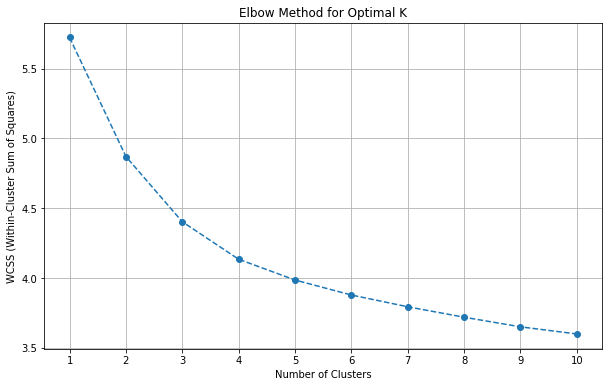

0    5466
2    5400
1    5016
3    2072
Name: cluster, dtype: int64
               age   height_cm  weight_kgs  overall_rating  potential  \
cluster                                                                 
0        25.123125  177.845075   76.867581       64.018295  69.793816   
1        23.476077  171.014514   72.021730       62.864035  70.348485   
2        27.613889  171.194119   74.230130       72.311296  74.720185   
3        26.451737  186.601737   81.898214       64.452220  69.797780   

         international_reputation(1-5)  weak_foot(1-5)  skill_moves(1-5)  \
cluster                                                                    
0                             1.030004        2.782291          2.055799   
1                             1.003589        3.046053          2.571372   
2                             1.302593        3.196111          2.995556   
3                             1.091216        2.481178          1.003378   

          crossing  finishing  headi

In [33]:
import pandas as pd
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the player data

# Select relevant attributes for clustering
attributes = [
    'age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'international_reputation(1-5)', 'weak_foot(1-5)',
    'skill_moves(1-5)', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
    'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
    'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle'
]

# Filter the data to include only the selected attributes
X = df[attributes]

# Normalize the data (optional but recommended for K-means)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    centroids, distortion = kmeans(X_normalized, i)
    wcss.append(distortion)

# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (k)
k = 4  # Adjust this based on the elbow curve plot

# Perform K-means clustering with the chosen number of clusters
centroids, _ = kmeans(X_normalized, k)
clusters, _ = vq(X_normalized, centroids)

# Add the cluster labels to the dataset
df['cluster'] = clusters

# Print the counts of players in each cluster
print(df['cluster'].value_counts())

# You can further analyze and interpret the clusters based on the attributes
# For example, you can calculate the mean values of attributes for each cluster
cluster_means = df.groupby('cluster')[attributes].mean()
print(cluster_means)


# 6th 
Synergy analysis: Utilise various techniques to analyse how players complement each other in a team setting.


In [34]:
import pandas as pd
from itertools import combinations

# Function to calculate synergy metrics between players within teams
def calculate_synergy(df):
    # Initialize a list to store synergy metrics for player pairs
    synergy_list = []

    # Group the data by club team
    grouped_teams = df.groupby('club_team')

    # Iterate through each club team
    for team_name, group in grouped_teams:
        # Get the players in the current team
        players = group[['id', 'name', 'overall_rating', 'potential', 'value_euro', 'wage_euro']]

        # Iterate through each combination of two players in the team
        for player1, player2 in combinations(players.itertuples(index=False), 2):
            # Calculate synergy metrics for the player pair
            overall_rating_avg = (player1.overall_rating + player2.overall_rating) / 2
            potential_avg = (player1.potential + player2.potential) / 2
            value_euro_sum = player1.value_euro + player2.value_euro
            wage_euro_sum = player1.wage_euro + player2.wage_euro

            # Store the synergy metrics in a dictionary and append to the list
            synergy_list.append({
                'team': team_name,
                'player1': player1.name,
                'player2': player2.name,
                'overall_rating_avg': overall_rating_avg,
                'potential_avg': potential_avg,
                'value_euro_sum': value_euro_sum,
                'wage_euro_sum': wage_euro_sum
            })

    # Convert the synergy list to a DataFrame
    synergy_df = pd.DataFrame(synergy_list)
    
    return synergy_df

# Assuming df is the cleaned dataset
synergy_df = calculate_synergy(df)

# Display the synergy DataFrame
print(synergy_df.head())



                    team    player1        player2  overall_rating_avg  \
0  1. FC Heidenheim 1846  K. Müller   S. Griesbeck                70.5   
1  1. FC Heidenheim 1846  K. Müller  N. Theuerkauf                70.0   
2  1. FC Heidenheim 1846  K. Müller      P. Mainka                69.5   
3  1. FC Heidenheim 1846  K. Müller      V. Eicher                69.0   
4  1. FC Heidenheim 1846  K. Müller    D. Thomalla                69.0   

   potential_avg  value_euro_sum  wage_euro_sum  
0           71.0       3300000.0        14000.0  
1           70.5       2500000.0        13000.0  
2           72.0       2775000.0        12000.0  
3           70.0       2400000.0        11000.0  
4           70.5       2750000.0        12000.0  


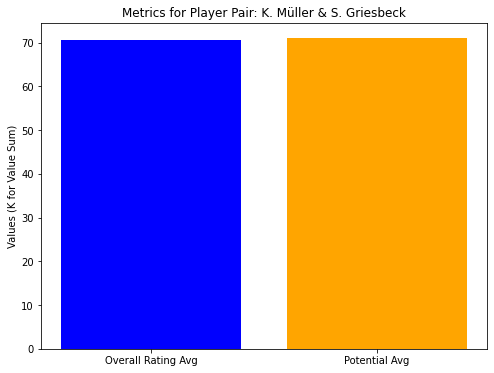

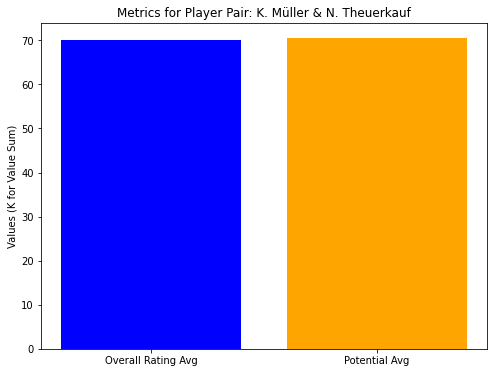

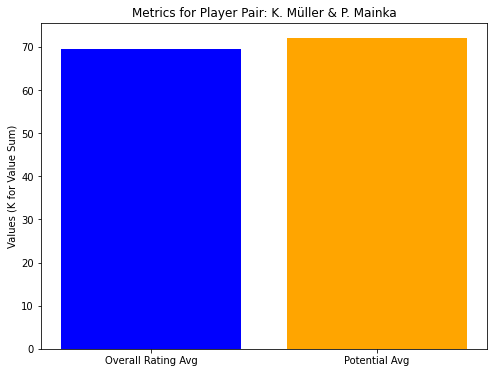

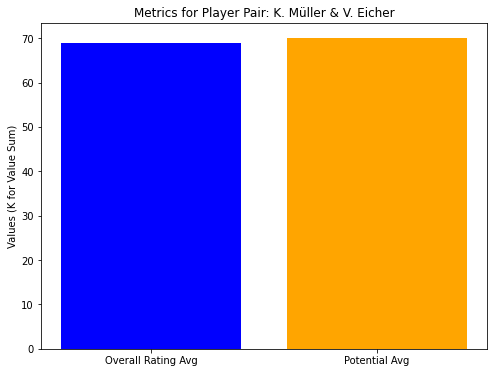

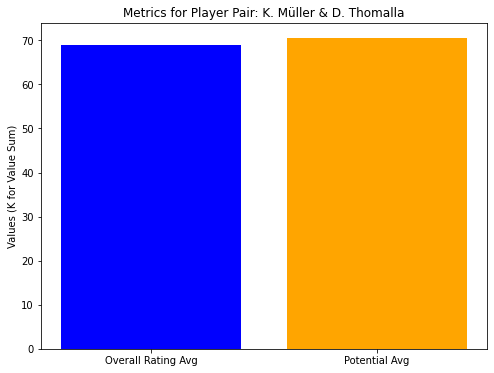

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Given the synergy metrics of player pairs
data = {
    'team': ['1. FC Heidenheim 1846'] * 5,
    'player1': ['K. Müller'] * 5,
    'player2': ['S. Griesbeck', 'N. Theuerkauf', 'P. Mainka', 'V. Eicher', 'D. Thomalla'],
    'overall_rating_avg': [70.5, 70.0, 69.5, 69.0, 69.0],
    'potential_avg': [71.0, 70.5, 72.0, 70.0, 70.5],
    'value_euro_sum': [3300000.0, 2500000.0, 2775000.0, 2400000.0, 2750000.0],
    'wage_euro_sum': [14000.0, 13000.0, 12000.0, 11000.0, 12000.0]
}

# Convert the data into a pandas DataFrame
synergy_df = pd.DataFrame(data)

# Function to plot a bar graph for each player pair
def plot_player_pair_bar_graph(synergy_df):
    # Iterate through each row in the synergy DataFrame
    for index, row in synergy_df.iterrows():
        # Create a new figure for each player pair
        plt.figure(figsize=(8, 6))
        
        # Player pair information
        player_pair = f"{row['player1']} & {row['player2']}"

        # Define the metrics and their values
        metrics = ['Overall Rating Avg', 'Potential Avg']
        values = [row['overall_rating_avg'], row['potential_avg']]

        # Create a bar graph for the metrics and values
        plt.bar(metrics, values, color=['blue', 'orange'])
        
        # Set the title as the player pair name
        plt.title(f'Metrics for Player Pair: {player_pair}')
        
        # Add y-axis label
        plt.ylabel('Values (K for Value Sum)')

        # Show the plot
        plt.show()

# Plot the bar graph for each player pair
plot_player_pair_bar_graph(synergy_df)


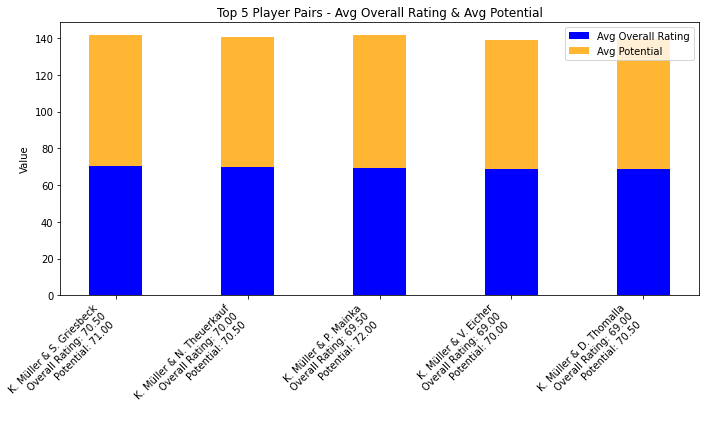

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the cleaned dataset
df = pd.read_csv('fifa_cleaned.csv')

# Function to calculate synergy metrics between players within teams
def calculate_synergy(df):
    # Initialize a list to store synergy metrics for player pairs
    synergy_list = []

    # Group the data by club team
    grouped_teams = df.groupby('club_team')

    # Iterate through each club team
    for team_name, group in grouped_teams:
        # Get the players in the current team
        players = group[['id', 'name', 'overall_rating', 'potential']]

        # Iterate through each combination of two players in the team
        for player1, player2 in combinations(players.itertuples(index=False), 2):
            # Calculate synergy metrics for the player pair
            overall_rating_avg = (player1.overall_rating + player2.overall_rating) / 2
            potential_avg = (player1.potential + player2.potential) / 2

            # Store the synergy metrics in a dictionary and append to the list
            synergy_list.append({
                'team': team_name,
                'player1': player1.name,
                'player2': player2.name,
                'overall_rating_avg': overall_rating_avg,
                'potential_avg': potential_avg
            })

    # Convert the synergy list to a DataFrame
    synergy_df = pd.DataFrame(synergy_list)
    
    return synergy_df

# Function to plot a bar graph for the top 5 records of synergy metrics
def plot_top_5_bar_graph(synergy_df):
    # Get the top 5 records from the synergy DataFrame
    top_5_synergy = synergy_df.head(5)

    # Create a figure and axes for the bar graph
    fig, ax = plt.subplots(figsize=(10, 6))

    # X-axis labels
    x_labels = []
    
    # Iterate through the top 5 records and plot overall rating average and potential average
    overall_ratings = []
    potentials = []
    
    for _, row in top_5_synergy.iterrows():
        # Create x-axis label
        x_labels.append(f'{row["player1"]} & {row["player2"]}\n'
                        f'Overall Rating: {row["overall_rating_avg"]:.2f}\n'
                        f'Potential: {row["potential_avg"]:.2f}')
        
        # Append values for overall rating and potential
        overall_ratings.append(row['overall_rating_avg'])
        potentials.append(row['potential_avg'])

    # Plot overall rating averages
    ax.bar(x_labels, overall_ratings, width=0.4, label='Avg Overall Rating', color='blue')
    
    # Plot potential averages
    ax.bar(x_labels, potentials, width=0.4, label='Avg Potential', color='orange', alpha=0.8, bottom=overall_ratings)

    # Customize the graph with title, labels, and legend
    ax.set_title('Top 5 Player Pairs - Avg Overall Rating & Avg Potential')
    ax.set_ylabel('Value')
    ax.legend()

    # Rotate the x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Calculate synergy metrics within teams
synergy_df = calculate_synergy(df)

# Plot the bar graph for the top 5 records of synergy metrics
plot_top_5_bar_graph(synergy_df)


# 7th 
Career Trajectory Analysis: Conduct a thorough analysis of different factors influencing a player's career trajectory.


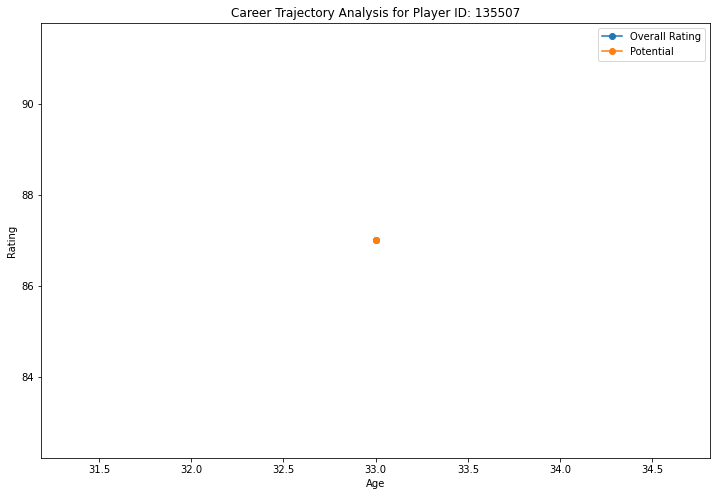

Player ID: 135507
Full Name: Fernando Luiz Rosa
Current Club: Manchester City
National Team: nan
Contract End Year: 2020
Value (Euro): €20,500,000.00
Wage (Euro): €200,000.00


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to analyze career trajectory
def analyze_career_trajectory(df, player_id):
    # Filter data for the specified player ID
    player_data = df[df['id'] == player_id]
    
    # Check if player data is available
    if player_data.empty:
        print(f"No data available for player with ID: {player_id}")
        return
    
    # Plot player performance metrics over time
    plt.figure(figsize=(12, 8))
    
    # Plot overall rating over time
    plt.plot(player_data['age'], player_data['overall_rating'], label='Overall Rating', marker='o')
    
    # Plot potential over time
    plt.plot(player_data['age'], player_data['potential'], label='Potential', marker='o')
    
    # Add title and labels
    plt.xlabel('Age')
    plt.ylabel('Rating')
    plt.title(f'Career Trajectory Analysis for Player ID: {player_id}')
    plt.legend()
    
    # Show the plot
    plt.show()
    
    # Display additional information about the player
    print(f"Player ID: {player_id}")
    print(f"Full Name: {player_data['full_name'].iloc[0]}")
    print(f"Current Club: {player_data['club_team'].iloc[0]}")
    print(f"National Team: {player_data['national_team'].iloc[0]}")
    print(f"Contract End Year: {player_data['contract_end_year'].iloc[0]}")
    print(f"Value (Euro): €{player_data['value_euro'].iloc[0]:,.2f}")
    print(f"Wage (Euro): €{player_data['wage_euro'].iloc[0]:,.2f}")

# Specify the player ID you want to analyze
player_id = 135507
  # Replace with the player ID you want to analyze

# Perform career trajectory analysis for the specified player
analyze_career_trajectory(df, player_id)
